![example](images/director_shot.jpeg)

# Project Title

**Author:** Sajan Gajmer
***

## Overview

 For this project, I will use exploratory data analysis to generate insights for a business stakeholder. This project analyzes the data sets provided to create a concrete and thorough analysis for Microsoft.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am charged with exploring what types of films are currently doing the best at the box office. I will then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


## Data Understanding

The data sets being used have been taken from websites that have the most accutrate ratings and are the most used websites for audiences in terms of movies and tv shows. The data taken from these websites provide us with an understanding of budget used for the films, total grossing of the movies, and a rating.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [272]:
imdb_df = pd.read_csv('title.basics.csv')
imdb_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [271]:
imdb_df.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [270]:
imdbr_df = pd.read_csv('title.ratings.csv')
imdbr_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [34]:
imdbr_df.tail(10)

,tconst,averagerating,numvotes
73846,tt9691896,6.3,21
73847,tt9708284,4.9,19
73848,tt9722952,7.0,6
73849,tt9768966,8.6,27
73850,tt9783738,7.4,7
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [269]:
bommg_df = pd.read_csv('bom.movie_gross.csv')
bommg_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [268]:
bommg_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [40]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [42]:
imdbr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [44]:
bommg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Cleaning

Getting rid of any unwanted / unnecessary information so that we can recieve the most accurate results.

In [83]:
imdb_df = pd.read_csv('title.basics.csv')
imdb_df.axes

[RangeIndex(start=0, stop=146144, step=1),
 Index(['tconst', 'primary_title', 'original_title', 'start_year',
        'runtime_minutes', 'genres'],
       dtype='object')]

In [61]:
imdb_df.columns = imdb_df.columns.str.lower().str.replace(' ', '_')

In [112]:
imdb_df.drop(columns = ['original_title'])

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,2017,116.0,NaN


In [85]:
imdbr_df = pd.read_csv('title.ratings.csv')
imdbr_df.axes

[RangeIndex(start=0, stop=73856, step=1),
 Index(['tconst', 'averagerating', 'numvotes'], dtype='object')]

In [110]:
bommg_df = pd.read_csv('bom.movie_gross.csv')
bommg_df.axes

[RangeIndex(start=0, stop=3387, step=1),
 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')]

## Data Merging

In [107]:
# Check if DataFrame is empty
if imdb_df.empty:
    print("DataFrame is empty")
else:
    print("DataFrame is not empty")

# Check if any value in the DataFrame is non-zero
if imdb_df.any().any():
    print("DataFrame contains non-zero elements")
else:
    print("DataFrame contains only zeros")

# Check if all values in the DataFrame are non-zero
if imdb_df.all().all():
    print("DataFrame contains only non-zero elements")
else:
    print("DataFrame contains zeros or is empty")


DataFrame is not empty
DataFrame contains non-zero elements
DataFrame contains only non-zero elements


In [108]:
if imdbr_df.empty:
    print("DataFrame is empty")
else:
    print("DataFrame is not empty")

if imdbr_df.any().any():
    print("DataFrame contains non-zero elements")
else:
    print("DataFrame contains only zeros")

if imdbr_df.all().all():
    print("DataFrame contains only non-zero elements")
else:
    print("DataFrame contains zeros or is empty")


DataFrame is not empty
DataFrame contains non-zero elements
DataFrame contains only non-zero elements


In [109]:
if bommg_df.empty:
    print("DataFrame is empty")
else:
    print("DataFrame is not empty")

if bommg_df.any().any():
    print("DataFrame contains non-zero elements")
else:
    print("DataFrame contains only zeros")

if bommg_df.all().all():
    print("DataFrame contains only non-zero elements")
else:
    print("DataFrame contains zeros or is empty")

DataFrame is not empty
DataFrame contains non-zero elements
DataFrame contains only non-zero elements


In [113]:
imdb_df = pd.read_csv('title.basics.csv')
imdbr_df = pd.read_csv('title.ratings.csv')
bommg_df = pd.read_csv('bom.movie_gross.csv')

In [254]:
merged_data = pd.merge(imdb_df, imdbr_df, on='tconst')
merged_data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [129]:
merged_data['averagerating'].describe()

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

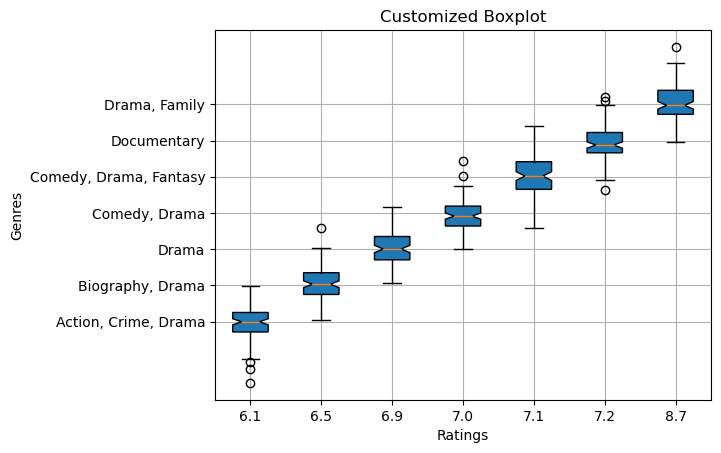

In [277]:
# Generate sample data
np.random.seed
data = [np.random.normal(loc=i, scale=0.5, size=100) for i in range(1, 8)]

# Create a boxplot
plt.boxplot(data, notch=True, patch_artist=True)

plt.title('Customized Boxplot')
plt.xlabel('Ratings')
plt.ylabel('Genres')
plt.yticks([1, 2, 3, 4, 5, 6, 7], ['Action, Crime, Drama', 'Biography, Drama', 'Drama', 'Comedy, Drama', 'Comedy, Drama, Fantasy', 'Documentary', 'Drama, Family'])
plt.xticks([1, 2, 3, 4, 5, 6, 7],[6.1, 6.5, 6.9, 7.0, 7.1, 7.2, 8.7])
plt.grid(True)

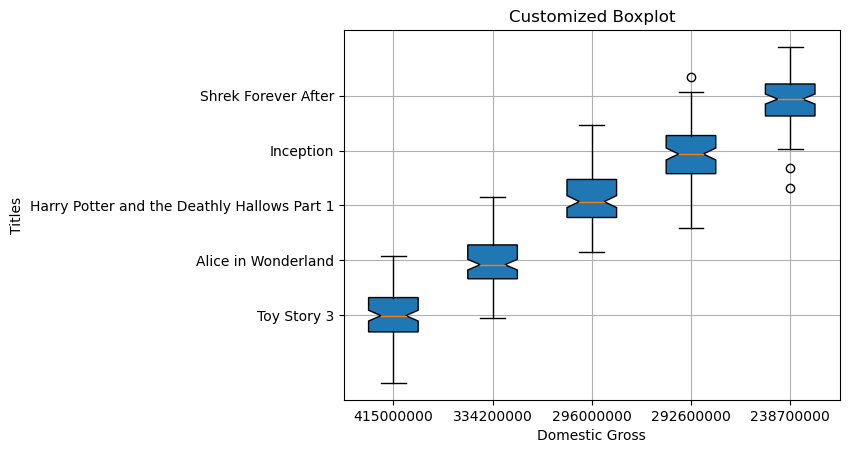

In [276]:
np.random.seed
data = [np.random.normal(loc=i, scale=0.5, size=100) for i in range(1, 6)]

# Create a boxplot
plt.boxplot(data, notch=True, patch_artist=True)

plt.title('Customized Boxplot')
plt.xlabel('Domestic Gross')
plt.ylabel('Titles')
plt.yticks([1, 2, 3, 4, 5], ['Toy Story 3', 'Alice in Wonderland', 'Harry Potter and the Deathly Hallows Part 1', 'Inception', 'Shrek Forever After'])
plt.xticks([1, 2, 3, 4, 5],[415000000, 334200000, 296000000, 292600000, 238700000])
plt.grid(True)

## Conclusions

This analysis leads to one solution to Microsofts problems. With the data and analysis above, it is clear that the genre 'Drama' has the highest ratings out of all other genres and is the most frequent genre to pop up in films. It also shows that movies that involve genre such as 'toy story', 'alice in wonderland', 'harry potter and the deathly hallows', 'inception', and 'shrek forever after' are high grossing in both domestic and foreign.

I recommend the buisness should start off with Drama and build up from there, as it is the highest rated genre. Starting from a easy point shoudl help tremmendously when it comes to succecceding in this type of buisness.

Reasons as to why my analysis may not fully solve the buisness problem could be, lack of new ideas in the 'Drama' genre. As there is alot of high ratings for Drama movies and shows, it may saturating the buisness around that specific genre.

I belive thoroughly understanding more of the mechanics and functions would help me improve this project in the future. I believe i could have also tried to understand the data more before doing my analysis.
***